<a href="https://colab.research.google.com/github/GETHUB55/SkillTreePython-DeepLearning/blob/main/01.%EB%94%A5%EB%9F%AC%EB%8B%9Dwith%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0-basic/ch01_04_DNN%EA%B8%B0%EC%B4%88_%EC%9D%B4%EC%A7%84%EB%B6%84%EB%A5%98%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch01.04 DNN기초 - 이진분류 모델


---
* 날짜:
* 이름:

## 학습내용
    - 딥러닝을 이용한 이진분류 모델 구현
    - 적절한 손실함수와 최적화 함수 정의
    - 평가 및 예측

## 학습자료

* 모두의딥러닝 11장, 13장
* 데이터
  * `sornar.csv`
  * `pima-indians-diabetes.csv`


```
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
seed=1
np.random.seed(seed)
tf.random.set_seed(seed)
```

```
https://github.com/yebiny/SkillTreePython-DeepLearning.git
```

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
seed=1
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
! git clone https://github.com/GETHUB55/SkillTreePython-DeepLearning

Cloning into 'SkillTreePython-DeepLearning'...
remote: Enumerating objects: 376, done.
remote: Counting objects: 100% (183/183), done.
remote: Compressing objects: 100% (109/109), done.
remote: Total 376 (delta 122), reused 99 (delta 74), pack-reused 193
Receiving objects: 100% (376/376), 28.23 MiB | 12.28 MiB/s, done.
Resolving deltas: 100% (157/157), done.


## 소나 데이터 광물 예측
---

> 1988년 존스홉킨스 대학교의 세즈노프스키(Sejnowski) 교수는 광석과 일반 돌을 가져다 놓고 음파 탐지기를 쏜 후 그 결과를 데이터를 정리했습니다. 신경망이 광석과 돌을 얼마나 잘 구분하는지 알아보도록 합시다.

```
- 0~59 : 음파 탐지기를 이용해 얻은 값
- 60: 광석 구분 {R, M}
```
<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0104-01.PNG?raw=true width=450>
</p>




### | 데이터 준비

#### **데이터 로드**
* `sonar.csv`

In [44]:
path = '/content/SkillTreePython-DeepLearning/dataset/sonar.csv'
dataset = pd.read_csv(path, header =None)

print(dataset.shape)
dataset

(208, 61)


,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


#### **데이터 전처리**

In [45]:
from sklearn.preprocessing import StandardScaler, LabelEncoder #머신러닝 라이브러니
from sklearn.model_selection import train_test_split

def path2dataset_sonar(path):

# 불러오기
  dataset = pd.read_csv(path,        #엑셀, csv 등 정형데이터를 불러오기
                        header = None  #첫번째 샘플이 헤더로 읽히지 않도록 설정
                        ) #데이터 형식: 판다스의 데이터프레임
                      
  dataset= dataset.values #데이터 형식: 넘파이 배열로 변환 (x-y분할해야하는데 걔네는 넘파이 배열이라 변환해줌)

# x-y 분할 -> 넘파이 배열을 슬라이싱하는 기법
  x = dataset[:, 0:-1] # (:모든행, 첫번째부터 마지막전까지의 열)
  y = dataset[:, -1] # (:모든행, 마지막열)

# 정규화(속성별로 데이터의 스케일을 조정) - x데이터에만 해줌
  scaler = StandardScaler()
  x = scaler.fit_transform(x)

  # y{R,M} ->{0,1} 문자를 숫자로 바꿈 : 라벨링 . from에 라벨인코더 첨가
  labeling = LabelEncoder()
  y = labeling.fit_transform(y)
  print(labeling.classes_)

# train - test 분할
  x_train, x_test,y_train, y_test = train_test_split(x,y,test_size=0.3)

  return x_train, x_test,y_train, y_test

x_train, x_test,y_train, y_test=path2dataset_sonar(path)
print(x_train.shape, x_test.shape,y_train.shape, y_test.shape)
print(f'첫 번째 샘플 x:{x_train[0]}')
print(f'첫 번째 샘플 y:{y_train[0]}')

['M' 'R']
(145, 60) (63, 60) (145,) (63,)
첫 번째 샘플 x:[-4.43151731e-01 -1.05340339e+00  5.31301846e-01 -1.87269709e-01
 -7.56109028e-01 -6.03261023e-01 -5.13417493e-01  1.24794648e-01
 -8.80617195e-01 -1.29283515e+00 -6.80687617e-01  6.94735997e-01
  3.29923021e-01 -8.69599845e-02 -1.48147120e+00 -1.38431837e+00
 -7.58748828e-01  1.52615267e-02 -4.77572220e-01 -1.32292855e-03
  1.52955930e-01  3.88710230e-01  7.10112032e-01  8.54972164e-01
  1.32839681e+00  6.69043376e-01 -1.87112282e-01 -7.83219777e-01
 -6.69140907e-01 -5.80914477e-01 -2.45344367e-01  6.65634120e-02
  5.88693885e-01  5.52991371e-01  5.53284785e-01  5.39887442e-01
  2.59858657e-01 -4.52117486e-01 -1.03375735e+00  4.11225021e-01
  7.11473869e-01  1.35696146e+00  1.26250984e+00  2.54380402e-01
 -2.55396726e-01 -3.60970300e-01 -6.61178244e-01 -2.01136087e-01
 -5.41684805e-01 -9.84735643e-01 -1.12430759e+00 -4.28704406e-01
  1.54878871e-01  3.55796100e-02  1.55030440e-02  1.00979685e+00
 -1.07456407e-01 -8.90734177e-01 -3.95

* 예측값 분포 확인

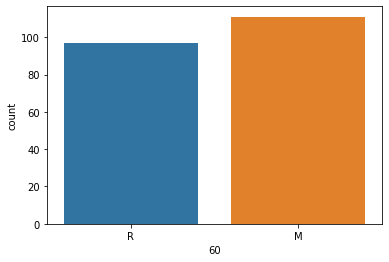

In [8]:
sns.countplot(x=dataset[60]) #두개중 하나라 카운트씀

### | 모델


<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0104-02.PNG?raw=true width=500>
</p>


#### **모델 생성**

In [47]:
#60->30->!
from tensorflow.keras import models, layers, utils

def build_model():
 x= layers.Input(shape=(60))
 y= layers.Dense(30, activation='relu')(x)
 y= layers.Dense(1, activation='sigmoid')(y) # 이진분류 문제 경우, 마지막 레이어의 activation는 sigmoid 사용
 model = models.Model(x,y)

 return model

#### **모델 시각화**

* `model.summary()`
* `utils.plot_model()`

In [48]:
model =build_model()
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 60)]              0         
                                                                 
 dense_6 (Dense)             (None, 30)                1830      
                                                                 
 dense_7 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,861
Trainable params: 1,861
Non-trainable params: 0
_________________________________________________________________


### | 학습

#### **모델 컴파일**

```
model.compile(loss, optimizer, metrics) 
```
* `loss` : 이진분류에서는 'binary_crossentropy'
* `optimizer` : 'adam' (문제와 관련 없음)
* `metrics`

  * 추가적인 옵션

  * 딥러닝 알고리즘에 필수요소는 아니다

  * 사용자 편의(정확도...)


In [49]:
model.compile(loss='binary_crossentropy',
              optimizer= 'adam',
              metrics= ['accuracy']) 


#### **학습**

```
model.fit(x_train, y_train, epochs, batch_size)
```
* `x_train` : 넘파이 혹은 텐서 형식의 인풋 데이터
* `y_train` : 넘파이 혹은 텐서 형식의 아웃풋 데이터
* `epochs` : 학습 횟수
* `batch_size` : 배치 사이즈 (업데이트 한번에 사용될 샘플 개수)

In [50]:
model.fit(x_train, y_train, epochs=30, batch_size=10)

Epoch 1/30
15/15 [==============================] - 1s 3ms/step - loss: 0.7145 - accuracy: 0.5655
Epoch 2/30
15/15 [==============================] - 0s 2ms/step - loss: 0.6044 - accuracy: 0.6690
Epoch 3/30
15/15 [==============================] - 0s 2ms/step - loss: 0.5413 - accuracy: 0.7379
Epoch 4/30
15/15 [==============================] - 0s 3ms/step - loss: 0.5015 - accuracy: 0.7724
Epoch 5/30
15/15 [==============================] - 0s 3ms/step - loss: 0.4671 - accuracy: 0.7931
Epoch 6/30
15/15 [==============================] - 0s 3ms/step - loss: 0.4410 - accuracy: 0.8138
Epoch 7/30
15/15 [==============================] - 0s 2ms/step - loss: 0.4170 - accuracy: 0.8207
Epoch 8/30
15/15 [==============================] - 0s 3ms/step - loss: 0.3945 - accuracy: 0.8345
Epoch 9/30
15/15 [==============================] - 0s 3ms/step - loss: 0.3740 - accuracy: 0.8621
Epoch 10/30
15/15 [==============================] - 0s 2ms/step - loss: 0.3544 - accuracy: 0.8828
Epoch 11/30
15/15 [

### | 검증 및 예측


#### **검증**

```
model.evaluate(x_test, y_test)
```
* `x_test` : 넘파이 혹은 텐서 형식의 인풋 테스트 데이터
* `y_test` : 넘파이 혹은 텐서 형식의 아웃풋 테스트 데이터

In [51]:
model.evaluate(x_test, y_test)#과적합(overtilling?)이 일어났다


2/2 [==============================] - 0s 8ms/step - loss: 0.3130 - accuracy: 0.8730


[0.3129526972770691, 0.8730158805847168]

#### **예측**

```
model.predict(x_test)
```
* `x_test` : 넘파이 혹은 텐서 형식의 인풋 테스트 데이터
* `y_test` : 넘파이 혹은 텐서 형식의 아웃풋 테스트 데이터

In [52]:
y_pred=model.predict(x_test)
y_pred = y_pred.flatten()
y_pred = np.round(y_pred) #반올림
for i in range(50): 
  print('y true:' , y_test[i],'y_pred:', y_pred[i])
y_test.shape, y_pred.shape

y true: 1 y_pred: 1.0
y true: 1 y_pred: 1.0
y true: 1 y_pred: 1.0
y true: 0 y_pred: 0.0
y true: 0 y_pred: 0.0
y true: 1 y_pred: 1.0
y true: 1 y_pred: 1.0
y true: 1 y_pred: 1.0
y true: 1 y_pred: 1.0
y true: 0 y_pred: 0.0
y true: 1 y_pred: 1.0
y true: 1 y_pred: 1.0
y true: 0 y_pred: 0.0
y true: 0 y_pred: 0.0
y true: 1 y_pred: 0.0
y true: 0 y_pred: 1.0
y true: 0 y_pred: 0.0
y true: 0 y_pred: 0.0
y true: 0 y_pred: 0.0
y true: 1 y_pred: 1.0
y true: 0 y_pred: 0.0
y true: 1 y_pred: 1.0
y true: 0 y_pred: 1.0
y true: 1 y_pred: 0.0
y true: 1 y_pred: 1.0
y true: 1 y_pred: 0.0
y true: 0 y_pred: 0.0
y true: 0 y_pred: 0.0
y true: 1 y_pred: 1.0
y true: 0 y_pred: 0.0
y true: 1 y_pred: 1.0
y true: 1 y_pred: 1.0
y true: 1 y_pred: 1.0
y true: 1 y_pred: 1.0
y true: 0 y_pred: 0.0
y true: 0 y_pred: 0.0
y true: 0 y_pred: 0.0
y true: 0 y_pred: 0.0
y true: 0 y_pred: 0.0
y true: 1 y_pred: 1.0
y true: 0 y_pred: 0.0
y true: 0 y_pred: 0.0
y true: 0 y_pred: 0.0
y true: 0 y_pred: 0.0
y true: 1 y_pred: 1.0
y true: 0 

((63,), (63,))

* 예측 시각화

[[32  4]
 [ 4 23]]


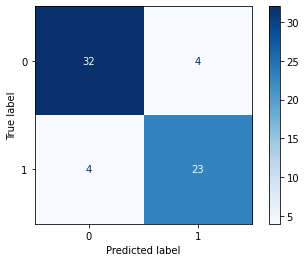

In [53]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# 혼돈 행렬
cm = confusion_matrix(y_test, y_pred)
print(cm)
ConfusionMatrixDisplay(cm).plot(cmap = 'Blues')

## 과제
---

### | 과제1. 이진분류 문제 정리

* 예측값의 범위 : 0 또는 1
* 예측값의 shape : (샘플수,1) 혹은 (샘플수,)
* 아웃풋 레이어의 노드 개수 :1
* 아웃풋 레이어의 activation : sigmoid
* 손실함수 (loss) : binary_crossentropy
* 평가함수 (metrics) : accuracy(정확도)

### | 과제2. 한 셀에 코드 정리하기

* 추가 연습
  * 모델의 깊이(depth)를 늘려가며 학습해 보세요.
  * 모델의 너비(width)를 늘려가며 학습해 보세요.

['M' 'R']
(145, 60) (63, 60) (145,) (63,)
첫 번째 샘플 x:[ 1.47090488  2.07001866  2.83725093  1.48672262  1.23600667  0.24472571
 -0.54099735 -0.51913442  0.27685426  1.12937847  2.34608528  1.93422616
  1.70238857  1.48058179  1.63760618  2.11992471  2.13888201  1.84431551
  1.1147038   0.66885323  0.3178097  -0.93735087 -2.32346573 -2.60942591
 -1.65232289 -1.75767767 -1.95357715 -2.1254666  -2.50874181 -1.48865093
 -1.43610266 -1.17495316 -0.84420537 -0.90007219 -0.48691293 -0.9520364
 -1.07174772 -0.64650635 -0.73717455 -1.61871871 -0.92532273 -0.59881152
 -0.66091577 -0.38711696 -0.83584065 -1.10564403 -0.49517148 -0.24449809
 -1.12159798 -1.05075617  0.80397123 -0.47032425  2.19936188 -0.01934105
  0.63780067  1.83114422  2.63009968 -0.34845747  0.5446608   1.31358318]
첫 번째 샘플 y:0
Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 60)]              0 

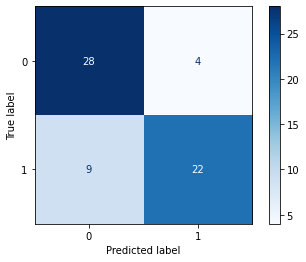

In [54]:
from sklearn.preprocessing import StandardScaler, LabelEncoder #머신러닝 라이브러니
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers, utils
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


def path2dataset_sonar(path):

# 불러오기
  dataset = pd.read_csv(path,        #엑셀, csv 등 정형데이터를 불러오기
                        header = None  #첫번째 샘플이 헤더로 읽히지 않도록 설정
                        ) #데이터 형식: 판다스의 데이터프레임
                      
  dataset= dataset.values #데이터 형식: 넘파이 배열로 변환 (x-y분할해야하는데 걔네는 넘파이 배열이라 변환해줌)

# x-y 분할 -> 넘파이 배열을 슬라이싱하는 기법
  x = dataset[:, 0:-1] # (:모든행, 첫번째부터 마지막전까지의 열)
  y = dataset[:, -1] # (:모든행, 마지막열)

# 정규화(속성별로 데이터의 스케일을 조정) - x데이터에만 해줌
  scaler = StandardScaler()
  x = scaler.fit_transform(x)

  # y{R,M} ->{0,1} 문자를 숫자로 바꿈 : 라벨링 . from에 라벨인코더 첨가
  labeling = LabelEncoder()
  y = labeling.fit_transform(y)
  print(labeling.classes_)

# train - test 분할
  x_train, x_test,y_train, y_test = train_test_split(x,y,test_size=0.3)

  return x_train, x_test,y_train, y_test

def build_model():
 x= layers.Input(shape=(60))
 y= layers.Dense(30, activation='relu')(x)
 y= layers.Dense(1, activation='sigmoid')(y) # 이진분류 문제 경우, 마지막 레이어의 activation는 sigmoid 사용
 model = models.Model(x,y)

 return model

x_train, x_test,y_train, y_test=path2dataset_sonar(path)
print(x_train.shape, x_test.shape,y_train.shape, y_test.shape)
print(f'첫 번째 샘플 x:{x_train[0]}')
print(f'첫 번째 샘플 y:{y_train[0]}')
 
model =build_model()
model.summary() 

model.compile(loss='binary_crossentropy',
              optimizer= 'adam',
              metrics= ['accuracy']) 
model.fit(x_train, y_train, epochs=30, batch_size=10)
y_pred=model.predict(x_test)
y_pred = y_pred.flatten()
y_pred = np.round(y_pred) #반올림
for i in range(50): 
  print('y true:' , y_test[i],'y_pred:', y_pred[i])
y_test.shape, y_pred.shape

cm = confusion_matrix(y_test, y_pred)
print(cm)
ConfusionMatrixDisplay(cm).plot(cmap = 'Blues')



### | 과제 3. 피마 인디언 당뇨병 예측


* `pima-indians-diabetes.csv`
```
df = pd.read_csv(data_path,
                names = ["pregnant", "plasma", "pressure", "thickness", "insulin", "BMI", "pedigree", "age", "class"])
```

In [55]:
path = '/content/SkillTreePython-DeepLearning/dataset/pima-indians-diabetes.csv'
dataset = pd.read_csv(path, header =None)

print(dataset.shape)
dataset

(768, 9)


,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [57]:
from sklearn.preprocessing import StandardScaler, LabelEncoder #머신러닝 라이브러니
from sklearn.model_selection import train_test_split

def path2dataset_db(path):

# 불러오기
 
  dataset = pd.read_csv(path,
              names = ["pregnant", "plasma", "pressure", "thickness", "insulin", "BMI", "pedigree", "age", "class"])                      
                      
  dataset= dataset.values #데이터 형식: 넘파이 배열로 변환 (x-y분할해야하는데 걔네는 넘파이 배열이라 변환해줌)

# x-y 분할 -> 넘파이 배열을 슬라이싱하는 기법
  x = dataset[:, 0:-1] # (:모든행, 첫번째부터 마지막전까지의 열)
  y = dataset[:, -1] # (:모든행, 마지막열)

# 정규화(속성별로 데이터의 스케일을 조정) - x데이터에만 해줌
  scaler = StandardScaler()
  x = scaler.fit_transform(x)

  # y{R,M} ->{0,1} 문자를 숫자로 바꿈 : 라벨링 . from에 라벨인코더 첨가
  labeling = LabelEncoder()
  y = labeling.fit_transform(y)
  print(labeling.classes_)

# train - test 분할
  x_train, x_test,y_train, y_test = train_test_split(x,y,test_size=0.3)

  return x_train, x_test,y_train, y_test

x_train, x_test,y_train, y_test=path2dataset_db(path)
print(x_train.shape, x_test.shape,y_train.shape, y_test.shape)
print(f'첫 번째 샘플 x:{x_train[0]}')
print(f'첫 번째 샘플 y:{y_train[0]}')

[0. 1.]
(537, 8) (231, 8) (537,) (231,)
첫 번째 샘플 x:[-0.25095213  2.06891246  0.04624525  0.09180513  1.04368861  0.55938666
 -0.19291401  0.23476686]
첫 번째 샘플 y:1


In [61]:
from tensorflow.keras import models, layers, utils

def build_model():
 x= layers.Input(shape=(8))
 y= layers.Dense(30, activation='relu')(x)
 y= layers.Dense(1, activation='sigmoid')(y) # 이진분류 문제 경우, 마지막 레이어의 activation는 sigmoid 사용
 model = models.Model(x,y)

 return model

model =build_model()
model.summary()

model.compile(loss='binary_crossentropy',
              optimizer= 'adam',
              metrics= ['accuracy']) 


Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense_12 (Dense)            (None, 30)                270       
                                                                 
 dense_13 (Dense)            (None, 1)                 31        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [62]:
model.fit(x_train, y_train, epochs=30, batch_size=10)

Epoch 1/30
54/54 [==============================] - 1s 4ms/step - loss: 0.6474 - accuracy: 0.6536
Epoch 2/30
54/54 [==============================] - 0s 4ms/step - loss: 0.5662 - accuracy: 0.7114
Epoch 3/30
54/54 [==============================] - 0s 3ms/step - loss: 0.5206 - accuracy: 0.7393
Epoch 4/30
54/54 [==============================] - 0s 4ms/step - loss: 0.4939 - accuracy: 0.7598
Epoch 5/30
54/54 [==============================] - 0s 3ms/step - loss: 0.4774 - accuracy: 0.7672
Epoch 6/30
54/54 [==============================] - 0s 2ms/step - loss: 0.4661 - accuracy: 0.7709
Epoch 7/30
54/54 [==============================] - 0s 2ms/step - loss: 0.4574 - accuracy: 0.7803
Epoch 8/30
54/54 [==============================] - 0s 2ms/step - loss: 0.4512 - accuracy: 0.7784
Epoch 9/30
54/54 [==============================] - 0s 2ms/step - loss: 0.4468 - accuracy: 0.7803
Epoch 10/30
54/54 [==============================] - 0s 2ms/step - loss: 0.4429 - accuracy: 0.7896
Epoch 11/30
54/54 [

y true: 1 y_pred: 0.0
y true: 0 y_pred: 0.0
y true: 1 y_pred: 1.0
y true: 0 y_pred: 0.0
y true: 1 y_pred: 0.0
y true: 1 y_pred: 0.0
y true: 1 y_pred: 1.0
y true: 1 y_pred: 1.0
y true: 0 y_pred: 1.0
y true: 0 y_pred: 1.0
y true: 0 y_pred: 0.0
y true: 1 y_pred: 1.0
y true: 1 y_pred: 1.0
y true: 0 y_pred: 1.0
y true: 0 y_pred: 1.0
y true: 1 y_pred: 0.0
y true: 1 y_pred: 0.0
y true: 1 y_pred: 1.0
y true: 0 y_pred: 0.0
y true: 1 y_pred: 0.0
y true: 1 y_pred: 1.0
y true: 0 y_pred: 0.0
y true: 0 y_pred: 0.0
y true: 0 y_pred: 0.0
y true: 0 y_pred: 0.0
y true: 0 y_pred: 0.0
y true: 1 y_pred: 1.0
y true: 1 y_pred: 1.0
y true: 0 y_pred: 1.0
y true: 0 y_pred: 0.0
y true: 0 y_pred: 0.0
y true: 0 y_pred: 0.0
y true: 0 y_pred: 0.0
y true: 0 y_pred: 0.0
y true: 0 y_pred: 0.0
y true: 0 y_pred: 0.0
y true: 0 y_pred: 0.0
y true: 1 y_pred: 1.0
y true: 1 y_pred: 0.0
y true: 1 y_pred: 0.0
y true: 1 y_pred: 1.0
y true: 0 y_pred: 0.0
y true: 1 y_pred: 1.0
y true: 0 y_pred: 0.0
y true: 0 y_pred: 0.0
y true: 0 

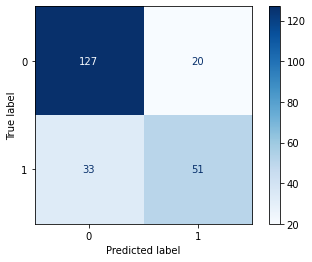

In [64]:
y_pred=model.predict(x_test)
y_pred = y_pred.flatten()
y_pred = np.round(y_pred) #반올림
for i in range(50): 
  print('y true:' , y_test[i],'y_pred:', y_pred[i])
y_test.shape, y_pred.shape

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# 혼돈 행렬
cm = confusion_matrix(y_test, y_pred)
print(cm)
ConfusionMatrixDisplay(cm).plot(cmap = 'Blues')

### | 과제 4. 생각해보기

데이터가 불균형 할 때 딥러닝에서는 어떠한 방법을 써서 이를 해결 하나요? 
